In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


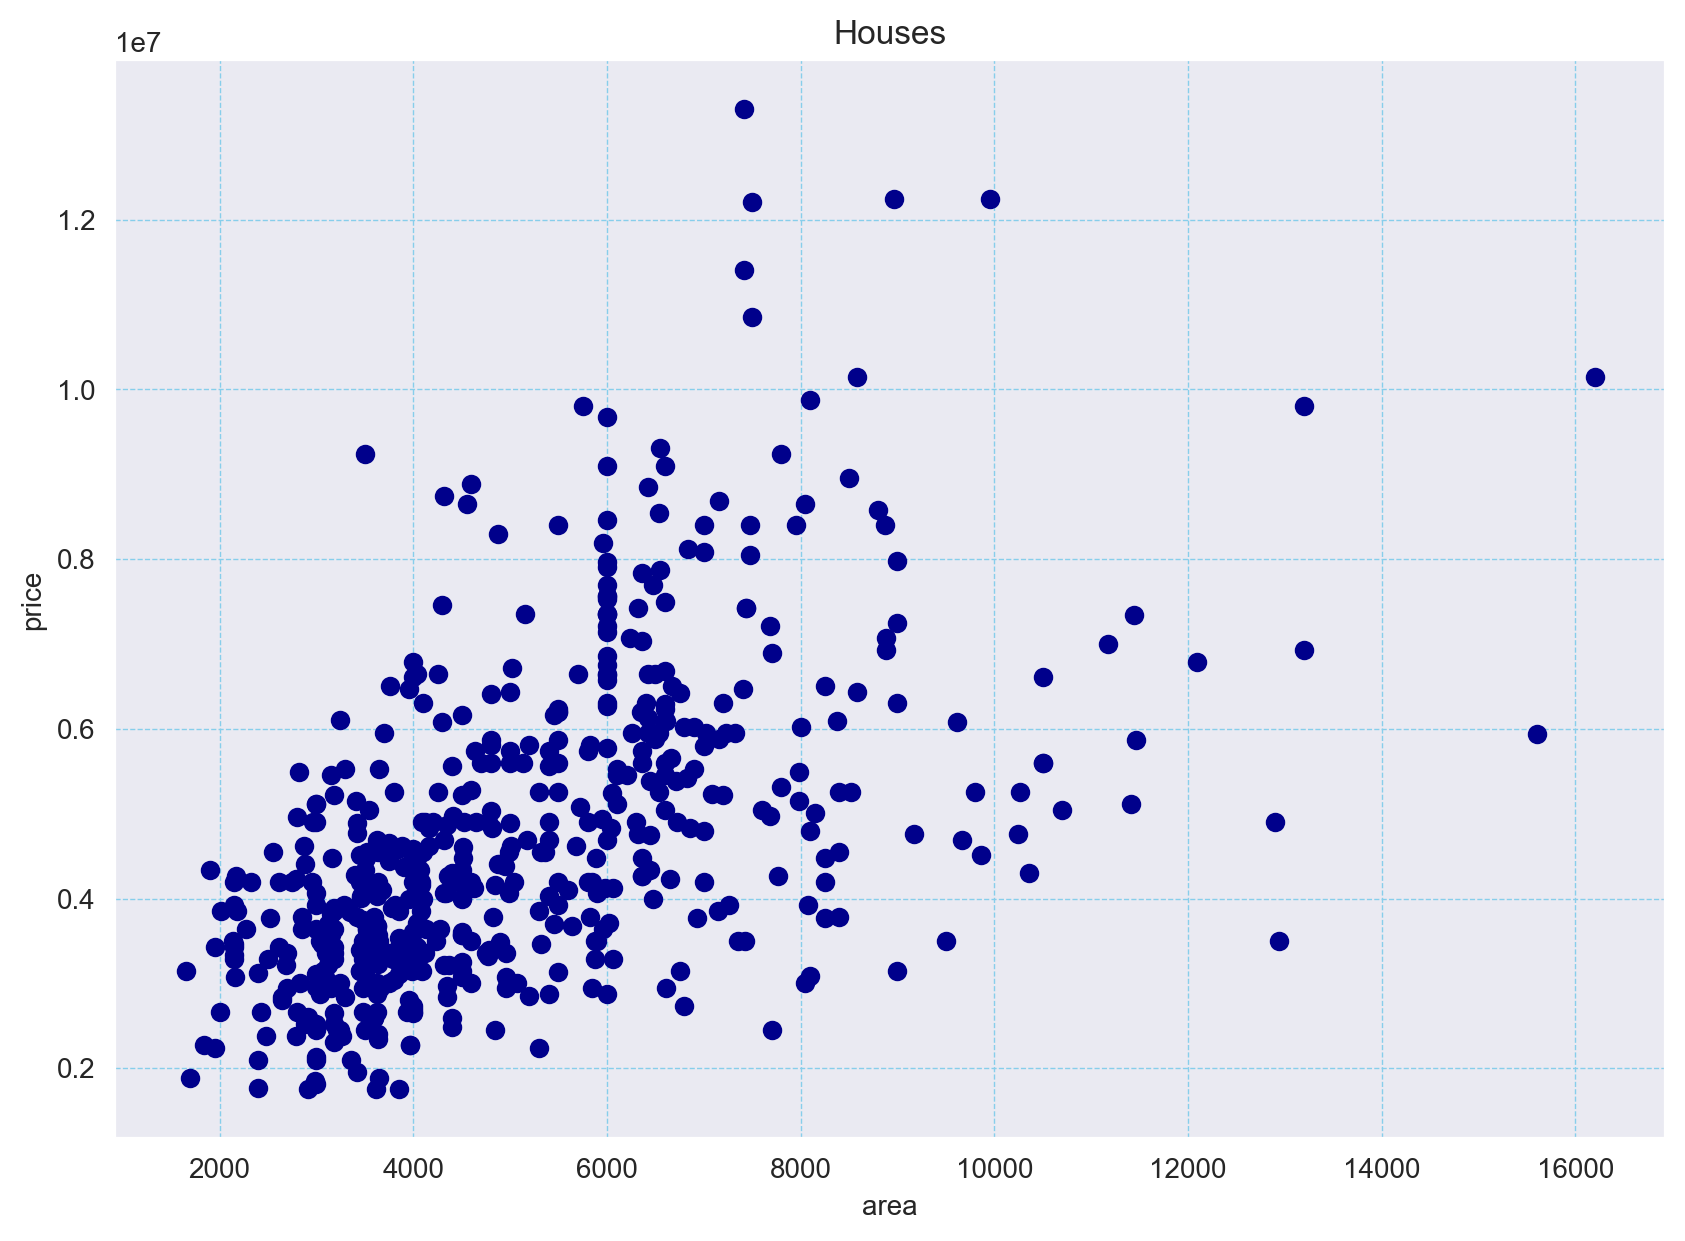

In [4]:
plt.figure(figsize = (10,7), dpi = 200)
plt.scatter(df['area'], df['price'], color='darkblue')
plt.xlabel('area')
plt.ylabel('price')
plt.title('Houses')
plt.grid(color='skyblue', linestyle='--', linewidth=0.5)
plt.show()

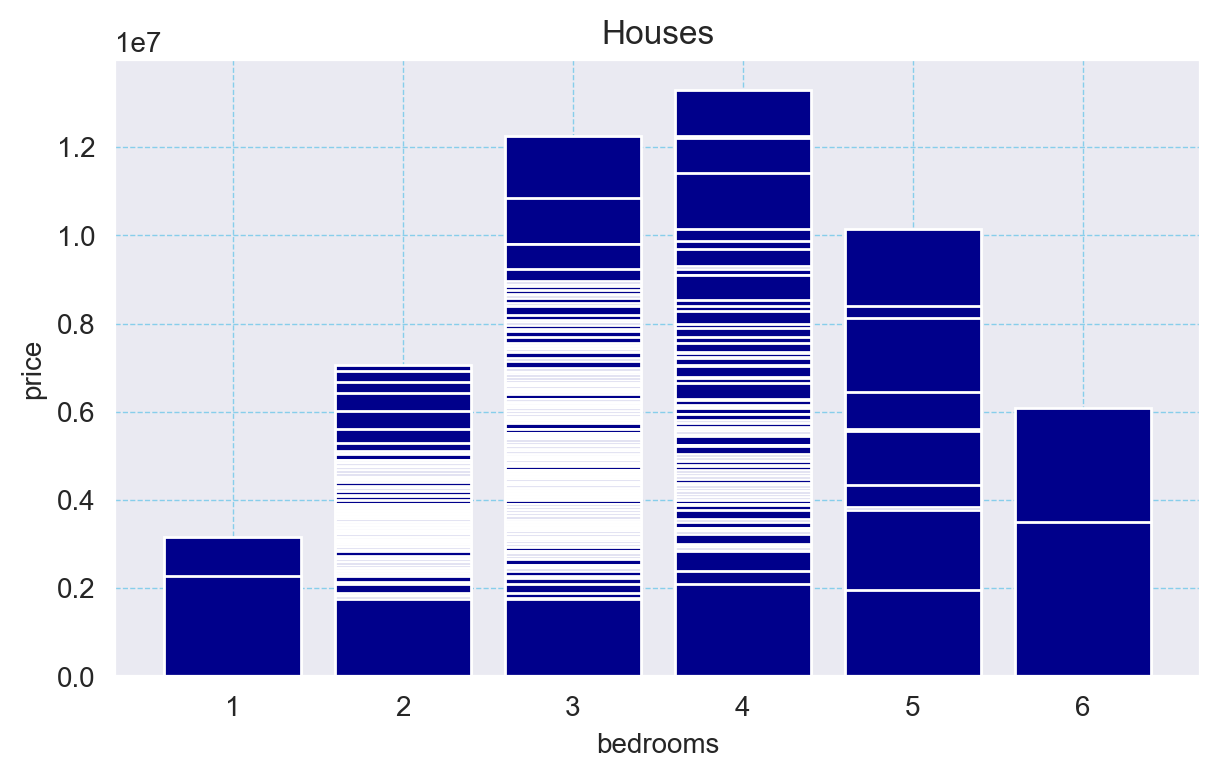

In [5]:
plt.figure(figsize = (7,4), dpi = 200)
plt.bar(df['bedrooms'], df['price'], color='darkblue')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Houses')
plt.grid(color='skyblue', linestyle='--', linewidth=0.5)
plt.show()

In [6]:
X = df.drop('price', axis=1).values
y = df['price'].values

# First, split into training and remaining (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, split remaining into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print sizes for verification
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (381, 12), (381,)
Validation set: (82, 12), (82,)
Test set: (82, 12), (82,)


In [7]:
X_train

array([[7160,    3,    1, ...,    2,    1,    0],
       [3584,    2,    1, ...,    0,    0,    1],
       [4280,    2,    1, ...,    2,    0,    1],
       ...,
       [4500,    3,    2, ...,    1,    0,    2],
       [4040,    2,    1, ...,    0,    0,    0],
       [5500,    3,    2, ...,    1,    0,    1]], shape=(381, 12))

In [8]:
import numpy as np

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [10]:
import torch

# Convert input features to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Convert target values to tensors and reshape
y_train_tensor = torch.tensor(y_train_log, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val_log, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test_log, dtype=torch.float32).view(-1, 1)

# Print shape for verification
print(f"X_train_tensor: {X_train_tensor.shape}, y_train_tensor: {y_train_tensor.shape}")
print(f"X_val_tensor: {X_val_tensor.shape}, y_val_tensor: {y_val_tensor.shape}")
print(f"X_test_tensor: {X_test_tensor.shape}, y_test_tensor: {y_test_tensor.shape}")

X_train_tensor: torch.Size([381, 12]), y_train_tensor: torch.Size([381, 1])
X_val_tensor: torch.Size([82, 12]), y_val_tensor: torch.Size([82, 1])
X_test_tensor: torch.Size([82, 12]), y_test_tensor: torch.Size([82, 1])


In [11]:
import torch
from torch import nn

In [12]:
class BaseModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.hidden1 = nn.Linear(input_dim, 64)
        self.hidden2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x


class DeepModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.hidden1 = nn.Linear(input_dim, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.hidden3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x


class SimpleModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.hidden1 = nn.Linear(input_dim, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = self.output(x)
        return x


class DropoutModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.hidden1 = nn.Linear(input_dim, 128)
        self.dropout1 = nn.Dropout(0.3)
        self.hidden2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)
        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = self.dropout1(x)
        x = torch.relu(self.hidden2(x))
        x = self.dropout2(x)
        x = self.output(x)
        return x


class BatchNormModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.hidden1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.hidden2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.bn1(self.hidden1(x)))
        x = torch.relu(self.bn2(self.hidden2(x)))
        x = self.output(x)
        return x


In [15]:
from sklearn.metrics import r2_score

The R² score (coefficient of determination) measures how well the model fits the data.

A higher R² (closer to 1) means a better fit.

In [16]:
def describe_model(model):
    architecture = ""
    for name, layer in model.named_children():
        layer_type = str(layer)
        architecture += f"{name}: {layer_type}\n"
    return architecture

def save_experiment_results(experiment_id, model_class, lr, epochs, train_loss, val_loss, train_r2, val_r2, test_loss, test_r2):
    experiment_data = {
        'Experiment ID': experiment_id,
        'Model': model_class.__name__,
        'Learning Rate': lr,
        'Epochs': epochs,
        'Train Loss': train_loss,
        'Val Loss': val_loss,
        'Train R²': train_r2,
        'Val R²': val_r2,
        'Test Loss': test_loss,
        'Test R²': test_r2
    }

    try:
        df = pd.read_csv('experiment_results.csv')
        new_data = pd.DataFrame([experiment_data])
        df = pd.concat([df, new_data], ignore_index=True)
    except FileNotFoundError:
        df = pd.DataFrame([experiment_data])

    df.to_csv('experiment_results.csv', index=False)


In [20]:
def run_experiment(lr, epochs, experiment_id, model_class):
    model = model_class(input_dim=X_train_tensor.shape[1])
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    train_losses = []
    val_losses = []
    train_r2s = []
    val_r2s = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)
            train_r2 = r2_score(y_train_tensor.numpy(), outputs.numpy())
            val_r2 = r2_score(y_val_tensor.numpy(), val_outputs.numpy())

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        train_r2s.append(train_r2)
        val_r2s.append(val_r2)

        if epoch % 1000 == 0 or epoch == epochs - 1:
            print(f"Epoch [{epoch + 1}/{epochs}] | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f} | Train R²: {train_r2:.4f} | Val R²: {val_r2:.4f}")

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_r2 = r2_score(y_test_tensor.numpy(), test_outputs.numpy())

    print(f"Test Loss: {test_loss.item():.4f} | Test R² Score: {test_r2:.4f}")

    save_experiment_results(experiment_id, model_class, lr, epochs, train_losses[-1], val_losses[-1], train_r2s[-1], val_r2s[-1], test_loss.item(), test_r2)

    return train_losses, val_losses, test_r2

Running Experiment 1 | Model=BaseModel | lr=0.001 | epochs=5000
Epoch [1/5000] | Train Loss: 233.1298 | Val Loss: 231.8885 | Train R²: -1895.0453 | Val R²: -1343.6155
Epoch [1001/5000] | Train Loss: 0.0720 | Val Loss: 0.1621 | Train R²: 0.4148 | Val R²: 0.0603
Epoch [2001/5000] | Train Loss: 0.0371 | Val Loss: 0.1006 | Train R²: 0.6980 | Val R²: 0.4166
Epoch [3001/5000] | Train Loss: 0.0285 | Val Loss: 0.0814 | Train R²: 0.7678 | Val R²: 0.5283
Epoch [4001/5000] | Train Loss: 0.0237 | Val Loss: 0.0821 | Train R²: 0.8073 | Val R²: 0.5238
Epoch [5000/5000] | Train Loss: 0.0207 | Val Loss: 0.0842 | Train R²: 0.8314 | Val R²: 0.5120
Test Loss: 0.0685 | Test R² Score: 0.6072
Running Experiment 2 | Model=BaseModel | lr=0.001 | epochs=10000
Epoch [1/10000] | Train Loss: 227.7785 | Val Loss: 226.4133 | Train R²: -1851.5228 | Val R²: -1311.8678
Epoch [1001/10000] | Train Loss: 0.0753 | Val Loss: 0.1528 | Train R²: 0.3874 | Val R²: 0.1138
Epoch [2001/10000] | Train Loss: 0.0343 | Val Loss: 0.093

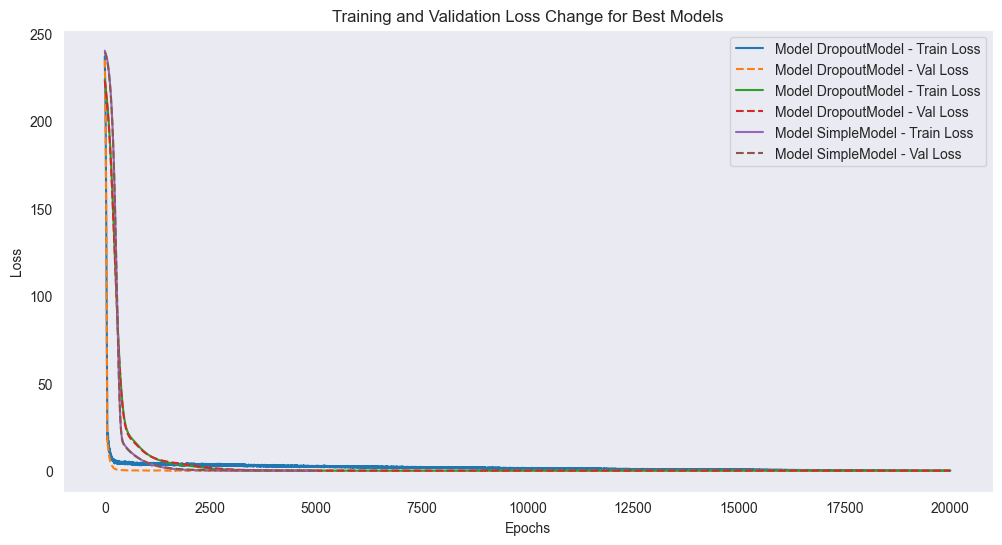

In [22]:
learning_rates = [0.001, 0.0005, 0.0001]
epochs_values = [5000, 10000, 20000]
model_classes = [BaseModel, DeepModel, SimpleModel, DropoutModel, BatchNormModel]

experiment_id = 1
all_losses = {}

for model_class in model_classes:
    for lr in learning_rates:
        for epochs in epochs_values:
            print(f"Running Experiment {experiment_id} | Model={model_class.__name__} | lr={lr} | epochs={epochs}")
            train_losses, val_losses, test_r2 = run_experiment(lr, epochs, experiment_id, model_class)
            all_losses[experiment_id] = (train_losses, val_losses)
            experiment_id += 1

# Plot training and validation losses for the best models

In [28]:

results_df = pd.read_csv("experiment_results.csv")
best_models_r2 = results_df.sort_values(by='Test R²', ascending=False).head(3)
print("Top 3 Models based on Test R²:")
print(best_models_r2[['Experiment ID', 'Model', 'Learning Rate', 'Epochs', 'Test Loss', 'Test R²']])


Top 3 Models based on Test R²:
     Experiment ID         Model  Learning Rate   Epochs  Test Loss   Test R²
105           30.0  DropoutModel          0.001  20000.0   0.052227  0.700670
67            24.0  DropoutModel          0.001  15000.0   0.053515  0.693285
59            16.0   SimpleModel          0.001   5000.0   0.055677  0.680894


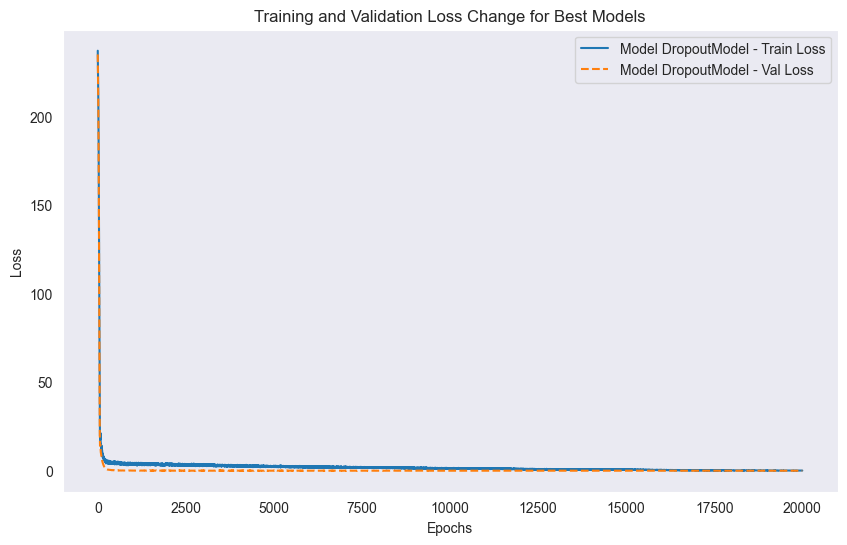

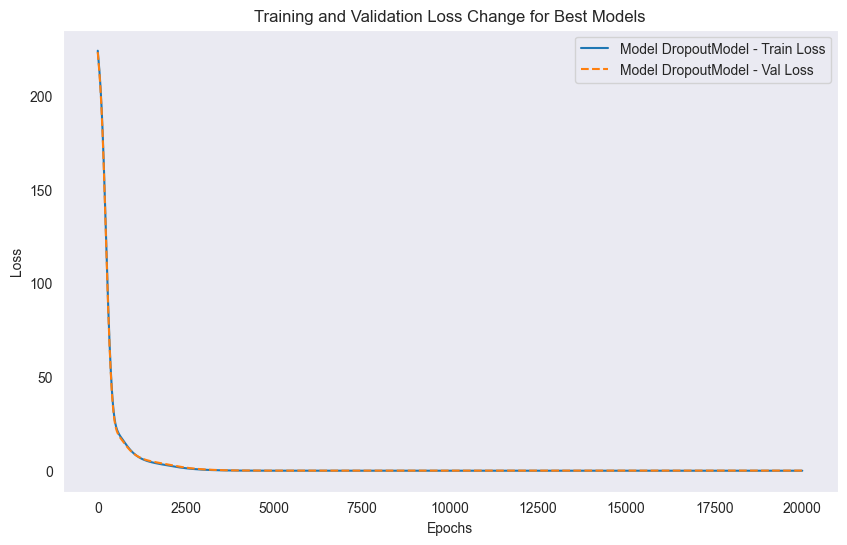

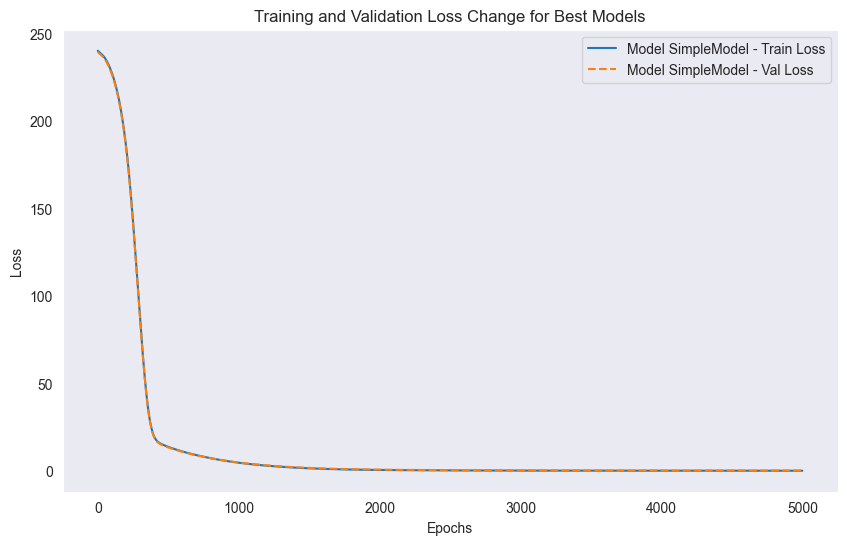

In [34]:
df_results = pd.read_csv('experiment_results.csv')
best_models = df_results.nsmallest(3, 'Test Loss')  # Select best 3 models based on test loss


for _, row in best_models.iterrows():
    plt.figure(figsize=(10, 6))
    exp_id = row['Experiment ID']
    train_losses, val_losses = all_losses[exp_id]
    plt.plot(train_losses, label=f"Model {row['Model']} - Train Loss")
    plt.plot(val_losses, linestyle='--', label=f"Model {row['Model']} - Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Change for Best Models")
    plt.legend()
    plt.grid()
    plt.show()

